In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
[transforms. ToTensor(),
transforms.Normalize((0.5,0.5,0.5), (0.5,8.5,0.5))])
batch_size = 4
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
shuffle=True,num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
download=True,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
'deer','dog', 'frog', 'horse', 'ship', 'truck') 

Files already downloaded and verified
Files already downloaded and verified


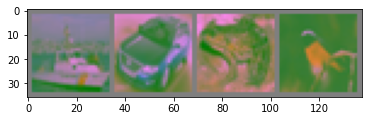

ship  car   frog  bird 


In [2]:
import matplotlib.pyplot as plt
import numpy as np
# functions to show an image
def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images))
# print Labels
print(' '.join(f'{classes[labels[j]]:5s}'for j in range(batch_size)))

In [3]:
import torch.nn as nn
import torch.nn.functional as func

class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()
    self.conv1 = nn.Conv2d(3,6,kernel_size=5)
    self.conv2 = nn.Conv2d(6,16,kernel_size=5)
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    x = func.relu(self.conv1(x))
    x = func.max_pool2d(x,2)
    x = func.relu(self.conv2(x))
    x = func.max_pool2d(x,2)
    x = x.view(x.size(0),-1)
    x = func.relu(self.fc1(x))
    x = func.relu(self.fc2(x))
    x = self.fc3(x)
    return x
net = LeNet()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)

LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [4]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)
for epoch in range(10):
  running_loss = 0.0
  for i,data in enumerate(trainloader,0):
    inputs,labels = data
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    inputs,labels = inputs.to(device),labels.to(device)

    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i %2000 ==1999:
      print(f'[{epoch+1},{i+1:5d}] loss:{running_loss/2000:.3f}')
      running_loss=0.0
print('Finished Training')

[1, 2000] loss:2.227
[1, 4000] loss:1.959
[1, 6000] loss:1.766
[1, 8000] loss:1.665
[1,10000] loss:1.585
[1,12000] loss:1.498
[2, 2000] loss:1.462
[2, 4000] loss:1.438
[2, 6000] loss:1.403
[2, 8000] loss:1.376
[2,10000] loss:1.335
[2,12000] loss:1.324
[3, 2000] loss:1.263
[3, 4000] loss:1.243
[3, 6000] loss:1.261
[3, 8000] loss:1.238
[3,10000] loss:1.238
[3,12000] loss:1.203
[4, 2000] loss:1.132
[4, 4000] loss:1.136
[4, 6000] loss:1.124
[4, 8000] loss:1.151
[4,10000] loss:1.131
[4,12000] loss:1.121
[5, 2000] loss:1.048
[5, 4000] loss:1.061
[5, 6000] loss:1.060
[5, 8000] loss:1.053
[5,10000] loss:1.056
[5,12000] loss:1.070
[6, 2000] loss:0.982
[6, 4000] loss:1.003
[6, 6000] loss:1.007
[6, 8000] loss:1.004
[6,10000] loss:1.001
[6,12000] loss:1.008
[7, 2000] loss:0.914
[7, 4000] loss:0.943
[7, 6000] loss:0.945
[7, 8000] loss:0.950
[7,10000] loss:0.979
[7,12000] loss:0.989
[8, 2000] loss:0.873
[8, 4000] loss:0.899
[8, 6000] loss:0.912
[8, 8000] loss:0.939
[8,10000] loss:0.914
[8,12000] los

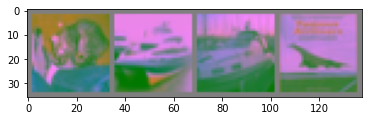

groudtruth: cat  ship ship plane


LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [5]:
path='./LeNet_net.pth'
torch.save(net.state_dict(),path)
net=LeNet()
net.load_state_dict(torch.load(path))
outputs=net(images)
dataiter=iter(testloader)
images,labels=dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('groudtruth:',''.join(f'{classes[labels[j]]:5s}'for j in range(4)))
correct_pred={classname:0 for classname in classes}
total_pred={classname:0 for classname in classes}
net.to(device)

In [6]:
with torch.no_grad():
  for data in testloader:
    images,labels=data
    images=images.to(device)
    labels=labels.to(device)
    outputs=net(images)
    _,predictions=torch.max(outputs,1)
    predictions.to(device)
    for label,prediction in zip(labels,predictions):
      if label==prediction:
        correct_pred[classes[label]]+=1
      total_pred[classes[label]]+=1
print('LeNet')
for clas,corr in correct_pred.items():
  acc=100*float(corr)/total_pred[clas]
  print(f'acc for class:{clas:5s} is {acc:.1f}%')

LeNet
acc for class:plane is 53.5%
acc for class:car   is 76.4%
acc for class:bird  is 47.1%
acc for class:cat   is 39.4%
acc for class:deer  is 58.3%
acc for class:dog   is 56.9%
acc for class:frog  is 72.7%
acc for class:horse is 56.8%
acc for class:ship  is 83.9%
acc for class:truck is 71.6%


In [7]:
import torch
import torch.nn as nn
import torch.nn. functional as F
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(3,6,5)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(6,16,5)
    self.fc1=nn.Linear(16*5*5,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)
  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=torch.flatten(x,1)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x
net = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [8]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)
for epoch in range(10):
  running_loss = 0.0
  for i,data in enumerate(trainloader,0):
    inputs,labels = data
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    inputs,labels = inputs.to(device),labels.to(device)

    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i %2000 ==1999:
      print(f'[{epoch+1},{i+1:5d}] loss:{running_loss/2000:.3f}')
      running_loss=0.0
print('Finished Training')

[1, 2000] loss:2.276
[1, 4000] loss:1.979
[1, 6000] loss:1.802
[1, 8000] loss:1.664
[1,10000] loss:1.581
[1,12000] loss:1.525
[2, 2000] loss:1.450
[2, 4000] loss:1.432
[2, 6000] loss:1.389
[2, 8000] loss:1.356
[2,10000] loss:1.349
[2,12000] loss:1.308
[3, 2000] loss:1.244
[3, 4000] loss:1.250
[3, 6000] loss:1.254
[3, 8000] loss:1.208
[3,10000] loss:1.215
[3,12000] loss:1.193
[4, 2000] loss:1.121
[4, 4000] loss:1.138
[4, 6000] loss:1.117
[4, 8000] loss:1.141
[4,10000] loss:1.136
[4,12000] loss:1.108
[5, 2000] loss:1.043
[5, 4000] loss:1.054
[5, 6000] loss:1.045
[5, 8000] loss:1.058
[5,10000] loss:1.037
[5,12000] loss:1.054
[6, 2000] loss:0.955
[6, 4000] loss:0.968
[6, 6000] loss:0.994
[6, 8000] loss:1.006
[6,10000] loss:1.007
[6,12000] loss:1.012
[7, 2000] loss:0.901
[7, 4000] loss:0.927
[7, 6000] loss:0.943
[7, 8000] loss:0.933
[7,10000] loss:0.959
[7,12000] loss:0.947
[8, 2000] loss:0.863
[8, 4000] loss:0.855
[8, 6000] loss:0.875
[8, 8000] loss:0.920
[8,10000] loss:0.916
[8,12000] los

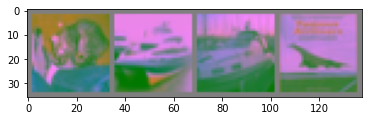

groudtruth: cat  ship ship plane


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [10]:
path='./net.pth'
torch.save(net.state_dict(),path)
net=Net()
net.load_state_dict(torch.load(path))
# outputs=net(images)
dataiter=iter(testloader)
images,labels=dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('groudtruth:',''.join(f'{classes[labels[j]]:5s}'for j in range(4)))
correct_pred={classname:0 for classname in classes}
total_pred={classname:0 for classname in classes}
net.to(device)

In [12]:
with torch.no_grad():
  for data in testloader:
    images,labels=data
    images=images.to(device)
    labels=labels.to(device)
    outputs=net(images)
    _,predictions=torch.max(outputs,1)
    predictions.to(device)
    for label,prediction in zip(labels,predictions):
      if label==prediction:
        correct_pred[classes[label]]+=1
      total_pred[classes[label]]+=1
print('Net')
for clas,corr in correct_pred.items():
  acc=100*float(corr)/total_pred[clas]
  print(f'acc for class:{clas:5s} is {acc:.1f}%')

Net
acc for class:plane is 66.6%
acc for class:car   is 72.7%
acc for class:bird  is 46.8%
acc for class:cat   is 48.6%
acc for class:deer  is 57.7%
acc for class:dog   is 49.4%
acc for class:frog  is 72.4%
acc for class:horse is 65.7%
acc for class:ship  is 84.4%
acc for class:truck is 71.6%
